# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(url)
apple.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
# convert the 'Date' column to datetime format
apple.Date= pd.to_datetime(apple.Date)
 
# Check the format of 'Date' column
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [6]:
apple = apple.set_index('Date')    # apple = is required
apple.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8465 non-null   float64
 1   High       8465 non-null   float64
 2   Low        8465 non-null   float64
 3   Close      8465 non-null   float64
 4   Volume     8465 non-null   int64  
 5   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


### Step 7.  Is there any duplicate dates?

In [8]:
apple.index.is_unique   # No! All are unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
apple.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [10]:
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
a = (apple.index[0] - apple.index[-1]).days
a

12261

In [18]:
# OR 
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [17]:
apple_months = apple.resample('BM').mean()
len(apple_months.index)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

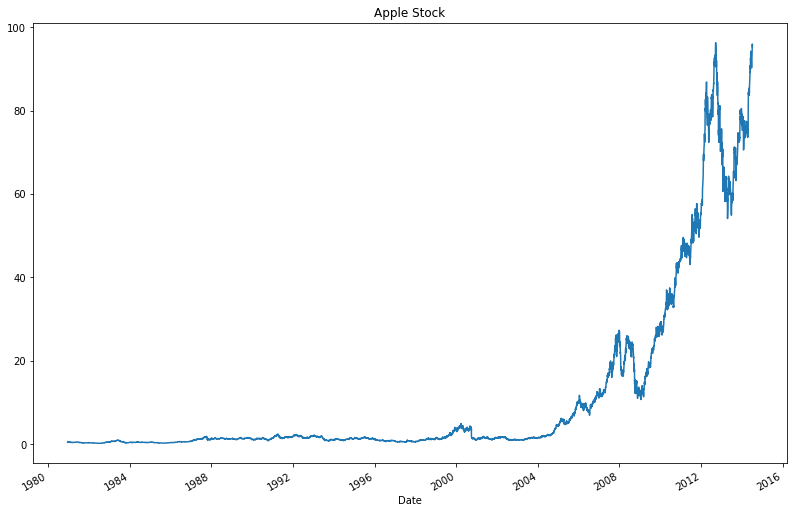

In [23]:
# makes the plot and assign it to a variable
apple_plot = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = apple_plot.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.

#### Step-Bonus: Plot the 'Volume' value. Set the size of the figure to 12 x 10 inches. Title: "Volume Apple Stock"

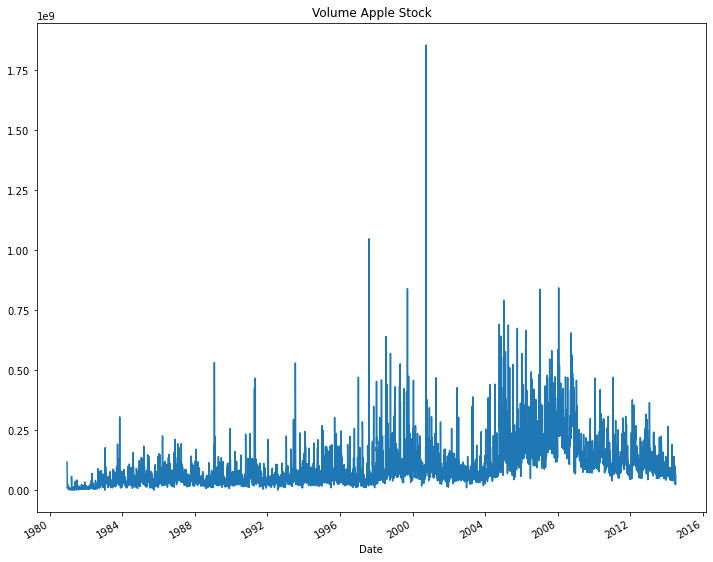

In [33]:
# makes the plot and assign it to a variable
apple_plot = apple.Volume.plot(title = "Volume Apple Stock")

# changes the size of the graph
fig = apple_plot.get_figure()
fig.set_size_inches(12, 10)